In [56]:
#IMPORT THE REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn
from feature_engine.missing_data_imputers import MeanMedianImputer
from sklearn import metrics


#FOR PLOTTING INLINE IN THE CELLS
%matplotlib inline

#IMPORT THE TESTING + TRAINING DATA
test = pd.read_csv("test_fjtUOL8.csv")
train = pd.read_csv("train_fNxu4vz.csv")


In [57]:
#COMBINE THE TRAIN + TEST DATA 

train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

#data.to_csv("data.csv")

(164309, 15) (109541, 14) (273850, 15)


In [58]:
# GET COLUMN INFORMATION

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  273850 non-null  int64  
 1   Loan_Amount_Requested    273850 non-null  object 
 2   Length_Employed          261543 non-null  object 
 3   Home_Owner               231790 non-null  object 
 4   Annual_Income            231850 non-null  float64
 5   Income_Verified          273850 non-null  object 
 6   Purpose_Of_Loan          273850 non-null  object 
 7   Debt_To_Income           273850 non-null  float64
 8   Inquiries_Last_6Mo       273850 non-null  int64  
 9   Months_Since_Deliquency  126612 non-null  float64
 10  Number_Open_Accounts     273850 non-null  int64  
 11  Total_Accounts           273850 non-null  int64  
 12  Gender                   273850 non-null  object 
 13  Interest_Rate            164309 non-null  float64
 14  sour

In [59]:
#GET DESCRIPTIVE STATISTICS

train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [60]:
#CHECK FOR MISSING DATA 

data.apply(lambda x: sum(x.isnull()))


Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
source                          0
dtype: int64

## Observations -->

1. The null/missing values are from both(train + test) dataset so needs to be treated for both the data sources.
2. The data having missing values are comparatively less for the corresponding variables. So, missing values will be treated accordingly for the required variable as follows -

Length_Employed 
Home_Owner 
Annual_Income 
Months_Since_Deliquency




In [61]:
#GET UNIQUE VALUE COUNTS FOR VARIOUS FEATURES / VARAIABLE IN THE DATA.

train.apply(lambda x: len(x.unique()))


Loan_ID                    164309
Loan_Amount_Requested        1290
Length_Employed                12
Home_Owner                      6
Annual_Income               12306
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3953
Inquiries_Last_6Mo              9
Months_Since_Deliquency       123
Number_Open_Accounts           58
Total_Accounts                100
Gender                          2
Interest_Rate                   3
source                          1
dtype: int64

In [62]:
#FILTER UNIQUE VALUES IN THE CATEGORICAL VARIABLES.

for col_name in data.columns:
    print(col_name)
    print(data[col_name].unique())

Loan_ID
[10000001 10000002 10000003 ... 10273848 10273849 10273850]
Loan_Amount_Requested
['7,000' '30,000' '24,725' ... '32,700' '33,450' '34,425']
Length_Employed
['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']
Home_Owner
['Rent' 'Mortgage' nan 'Own' 'Other' 'None']
Annual_Income
[ 68000.       nan  75566.4 ...  65988.  204600.   74760. ]
Income_Verified
['not verified' 'VERIFIED - income' 'VERIFIED - income source']
Purpose_Of_Loan
['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']
Debt_To_Income
[18.37 14.93 15.88 ... 38.34 39.56 38.78]
Inquiries_Last_6Mo
[0 3 1 2 4 5 6 7 8]
Months_Since_Deliquency
[ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15.  48.  39.  30.  32.  18.  24. 

In [63]:
# REPLACING THE VALUES IN HOME_OWNER FOR OTHER/NONE TO MORTGATE.

data['Home_Owner'] = data['Home_Owner'].replace({'None':'Mortgage','Other':'Mortgage'})

## Observations -->

1. Loan_Amount_Requested --> Should be converted into numerical values. Not an categorical variable
2. Length_Employed --> Needs to be cleaned for misleading values like and converted into pure year values in numeric form.
3. Home_Owner --> Needs to be analyzed for the importance and curated appropriately.
4. Annual_Income --> Needs to be analyzed and missing values should be replaced with appropriate values(may be if there is strong co-relation with other independent variables, which could be used for filled the missing values).
5. Income_Verified --> There seems typo in the variable value which needs to be corrected without changing the meaning of the same.
6. Purpose_Of_Loan --> Values seem fine but needs to be encoded if the feature is important.
7. Gender --> Values seems fine but need to analyze for the importance.
8. Interest_Rate --> Empty/missing/null values are from testing data, so no curation of missing values required infact this will be prediction/output from the built model.


In [64]:
#ENCODING FOR THE CATEGORICAL VARIABLES.

vars_categorical = ['Gender','Home_Owner','Length_Employed','Income_Verified','Purpose_Of_Loan']

for var in vars_categorical :
    print(var)
    value = data[var].mode()[0]
    data[var] = data[var].fillna(value)
    data.groupby([var])['Interest_Rate'].mean().plot()
    data.groupby([var])['Interest_Rate'].mean().sort_values()
    ordered_labels = data.groupby([var])['Interest_Rate'].mean().sort_values().index
    ordered_labels
    ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
    ordinal_mapping
    # replace the labels with the ordered numbers
    data[var] = data[var].map(ordinal_mapping)
    print(data[var].head(5))
    
data.isnull().sum()

Gender
0    0
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64
Home_Owner
0    2
1    0
2    0
3    0
4    1
Name: Home_Owner, dtype: int64
Length_Employed
0     0
1     4
2    10
3     0
4     5
Name: Length_Employed, dtype: int64
Income_Verified
0    0
1    2
2    1
3    1
4    1
Name: Income_Verified, dtype: int64
Purpose_Of_Loan
0    1
1    6
2    6
3    6
4    6
Name: Purpose_Of_Loan, dtype: int64


Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
source                          0
dtype: int64

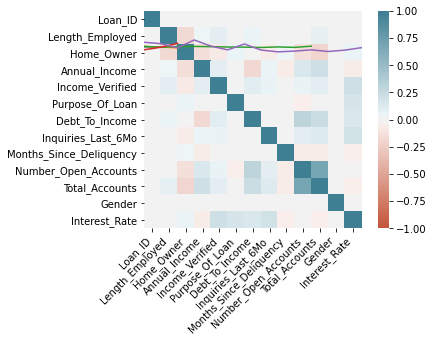

In [65]:
#IDENTIFYING VARIABLES USING UNIVARIATE/BIVARIATE/MULTIVARIATE ANALYSIS.

#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')


corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


## Observations -->

1. 

In [66]:
data.corr(method='pearson', min_periods=1)


,Loan_ID,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
Loan_ID,1.000000,0.002613,0.002723,0.004285,-0.001190,-0.000787,-0.000076,0.003562,-0.004893,-0.000140,0.002153,-0.000536,0.001290
Length_Employed,0.002613,1.000000,-0.160947,0.041654,0.097258,-0.012050,0.049516,-0.006528,0.005774,0.023786,0.084269,0.002018,0.033419
Home_Owner,0.002723,-0.160947,1.000000,-0.147897,-0.076003,0.049613,-0.003377,-0.053829,0.044548,-0.118880,-0.201154,-0.000742,0.055308
Annual_Income,0.004285,0.041654,-0.147897,1.000000,0.100244,-0.004593,-0.180756,0.058453,-0.055736,0.149062,0.211464,0.001162,-0.052783
Income_Verified,-0.001190,0.097258,-0.076003,0.100244,1.000000,0.025869,0.115101,0.066308,0.008998,0.069031,0.100740,0.002691,0.213371
Purpose_Of_Loan,-0.000787,-0.012050,0.049613,-0.004593,0.025869,1.000000,-0.019437,0.031198,-0.006439,-0.042981,-0.026519,-0.001137,0.175047
Debt_To_Income,-0.000076,0.049516,-0.003377,-0.180756,0.115101,-0.019437,1.000000,-0.005079,0.006626,0.303119,0.228669,0.001342,0.152472
Inquiries_Last_6Mo,0.003562,-0.006528,-0.053829,0.058453,0.066308,0.031198,-0.005079,1.000000,0.011673,0.099949,0.132369,-0.000353,0.188987
Months_Since_Deliquency,-0.004893,0.005774,0.044548,-0.055736,0.008998,-0.006439,0.006626,0.011673,1.000000,-0.050122,-0.060633,0.000485,-0.042108
Number_Open_Accounts,-0.000140,0.023786,-0.118880,0.149062,0.069031,-0.042981,0.303119,0.099949,-0.050122,1.000000,0.681922,0.001663,0.002847


In [67]:
#FILTER CATEGORICAL VARIABLES.

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#EXCLUDE ID COLUMNS AND SOURCE.

categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID','source','Interest_Rate']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Loan_Amount_Requested
10,000    19442
12,000    15020
15,000    13848
20,000    13399
35,000     9811
          ...  
750           1
33,900        1
34,275        1
34,700        1
32,600        1
Name: Loan_Amount_Requested, Length: 1320, dtype: int64


In [68]:
data.isnull().sum()


Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
source                          0
dtype: int64

##OBSERVATIONS -->

1. Loan_Amount_Requested --> is considered as an object or categorical variable due to comma, which needs to be converted to numeric.
2. Length_Employed --> Needs to be converted into pure numeric value.
3. Home_Owner --> Very minimal values for none and other which could be replaced with majority value of Modgage and also it needs to be label encouded if this is important variable.
4. Income_Verified --> Typos needs to be corrected in the values and also could be label encoded if this is a significan variable.
5. Purpose_Of_Loan --> Needs to be label encouded.
6. Gender --> Needs to be binary encoded since this could be of signifance importance.

In [69]:
# CONVERTING LOAN_AMOUNT_REQUESTED INTO NUMERIC.

data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].str.replace(',', '')

data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].astype(float)

data.info()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  273850 non-null  int64  
 1   Loan_Amount_Requested    273850 non-null  float64
 2   Length_Employed          273850 non-null  int64  
 3   Home_Owner               273850 non-null  int64  
 4   Annual_Income            231850 non-null  float64
 5   Income_Verified          273850 non-null  int64  
 6   Purpose_Of_Loan          273850 non-null  int64  
 7   Debt_To_Income           273850 non-null  float64
 8   Inquiries_Last_6Mo       273850 non-null  int64  
 9   Months_Since_Deliquency  126612 non-null  float64
 10  Number_Open_Accounts     273850 non-null  int64  
 11  Total_Accounts           273850 non-null  int64  
 12  Gender                   273850 non-null  int64  
 13  Interest_Rate            164309 non-null  float64
 14  sour

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
source                          0
dtype: int64

In [70]:
# MISSING VALUES TREATMENT

# WILL COME TO length_Employed LATER


# WILL COME TO Home_Owner MISSING VALUE IMPUTATION LATER.
# WILL REPLACE NONE/OTHER WITH MORTGAGE. EFFECTIVELY THE VALUES ARE 

#Mortgage    117369
#Rent         93542
#Own          20879

#data['Home_Owner'] = data['Home_Owner'].replace({'None':'Mortgage','Other':'Mortgage'})

#Annual_Income 
# WILL COME TO Annual Income later 


#Months_Since_Deliquency
#WILL COME TO Months_Since_Deliquency after correlation.

num_categorical = ['Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts','Loan_Amount_Requested']


median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts','Loan_Amount_Requested'])

median_imputer.fit(data)

data = median_imputer.transform(data)

data.isnull().sum()



Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income                   0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency         0
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
source                          0
dtype: int64

In [71]:
# CORRECTION OR REPLACEMENT OF TYPO VALUES.

#Change categories of Income_Verified:
print('Income_Verified:')
print(data['Income_Verified'].value_counts())

print('\nModified Categories:')
#data['Income_Verified'] = data['Income_Verified'].replace({'VERIFIED - income source':'VERIFIED - income'})
print(data['Income_Verified'].value_counts())

Income_Verified:
2    99076
1    88253
0    86521
Name: Income_Verified, dtype: int64

Modified Categories:
2    99076
1    88253
0    86521
Name: Income_Verified, dtype: int64


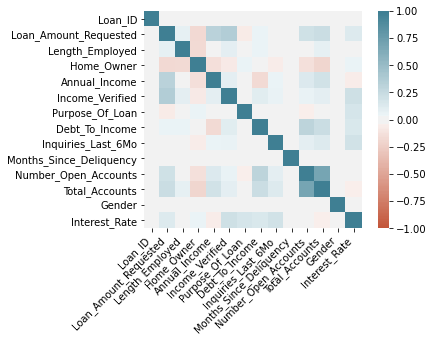

In [72]:
#IDENTIFYING VARIABLES USING UNIVARIATE/BIVARIATE/MULTIVARIATE ANALYSIS.

#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')


corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [73]:
#Drop the columns which have been converted to different types:
#data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#data.drop(['Unnamed: 0'],axis=1,inplace=True)
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Interest_Rate','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv")
test.to_csv("test_modified.csv")

C:\Users\Admin\.conda\envs\banking-hack-31-05-2020\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
#Mean based:
mean = train['Interest_Rate'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Loan_ID']]
base1['Interest_Rate'] = 1

#Export submission file
base1.to_csv("alg0.csv",index=False)

<ipython-input-74-e311e89c762d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Interest_Rate'] = 1


In [75]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score


#trim_data = train.head(2000)
X = train.drop('Interest_Rate', axis=1)
X.columns
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, train.Interest_Rate, test_size=0.3, random_state=42)
print(X_train)

##attrition_svm = svm.SVC(kernel='linear', C=1, gamma=1) 
##attrition_svm.fit(X_train, Y_train)


         Loan_ID  Loan_Amount_Requested  Length_Employed  Home_Owner  \
154665  10154666                15000.0                8           0   
16921   10016922                 4000.0                3           2   
12424   10012425                12000.0                8           0   
120271  10120272                14000.0                8           0   
104837  10104838                28000.0                8           0   
...          ...                    ...              ...         ...   
119879  10119880                 8000.0                6           0   
103694  10103695                10000.0               10           0   
131932  10131933                 5500.0                6           1   
146867  10146868                13000.0                0           0   
121958  10121959                29000.0                8           0   

        Annual_Income  Income_Verified  Purpose_Of_Loan  Debt_To_Income  \
154665       102204.0                2                2     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          164309 non-null  int64  
 3   Home_Owner               164309 non-null  int64  
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  int64  
 6   Purpose_Of_Loan          164309 non-null  int64  
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  164309 non-null  float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 17.6 MB


In [81]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

num_trees = 100
max_features = 3
attrition_forest = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
attrition_forest.fit(X_train, Y_train)

Y_pred = attrition_forest.predict(X_test)

from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(Y_test, Y_pred)
print(confusionmatrix)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(attrition_forest.score(X_test, Y_test)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))



[[ 2439  6086  1552]
 [ 1945 12973  6184]
 [  555  7504 10055]]
Accuracy of Random Forest classifier on test set: 0.52
              precision    recall  f1-score   support

         1.0       0.49      0.24      0.32     10077
         2.0       0.49      0.61      0.54     21102
         3.0       0.57      0.56      0.56     18114

    accuracy                           0.52     49293
   macro avg       0.52      0.47      0.48     49293
weighted avg       0.52      0.52      0.51     49293



In [82]:
test_RF = pd.read_csv("test_modified.csv")
test_RF.info()
test_df = pd.DataFrame(attrition_forest.predict(test_RF))

test_df.to_csv("prediction.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  int64  
 2   Length_Employed          109541 non-null  int64  
 3   Home_Owner               109541 non-null  int64  
 4   Annual_Income            109541 non-null  float64
 5   Income_Verified          109541 non-null  int64  
 6   Purpose_Of_Loan          109541 non-null  int64  
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  109541 non-null  int64  
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 10.9 MB
